In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
from matplotlib import pyplot as plt

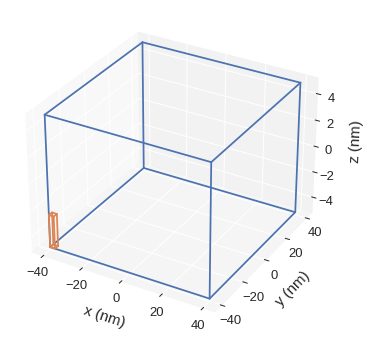

In [70]:
d=80e-9
thickness = 10e-9
cell = (2.5e-9, 2.5e-9, 2.5e-9)
p1 = (-d/2, -d/2, -thickness/2)
p2 = (d/2, d/2, thickness/2)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell)

mesh.mpl()

In [2]:
def parameter_space_point(d, B, initial_state):
    """
    Expected parameters:
    - d : disk diametre [in metres]
    - B : applied field [in Tesla]
    - initial_state: 'skyrmion' or 'uniform'"""
    thickness = 10e-9
    cell = (2.5e-9, 2.5e-9, 2.5e-9)
    p1 = (-d/2, -d/2, -thickness/2)
    p2 = (d/2, d/2, thickness/2)
    region = df.Region(p1=p1, p2=p2)
    mesh = df.Mesh(region=region, cell=cell)
    
    D = 1.58e-3
    Ms = 3.84e5
    A = 8.78e-12

    def Ms_fun(pos):
        x, y, z = pos
        if x**2 + y**2 <= (d/2)**2:
            return Ms
        else:
            return 0

    def m_fun(pos):
        x, y, z = pos
        kick=0.4*(np.random.rand(1)[0]-.5)
        if x**2 + y**2 <= (d/4)**2:
            return (0, 0, -1+kick)
        else:
            return (0, 0, 1+kick)
        
    if initial_state == 'skyrmion':
        value = m_fun
    elif initial_state == 'uniform':
        value = (0, 0, 1)
    elif initial_state == 'random':
        value = np.random.rand(3)
        
    system = mm.System(name='parameter_space_point')
    system.hamiltonian = mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='T') + mm.Demag() + \
        mm.Zeeman(H=(0, 0, B/mm.consts.mu0))
    system.m = df.Field(mesh, dim=3, value=value, norm=Ms_fun)
    
    md = oc.MinDriver()
    md.drive(system, overwrite=True)
    
    return system

In [3]:
system = parameter_space_point(80e-9, 0.2, initial_state='skyrmion')

Running OOMMF (ExeOOMMFRunner) [2021/07/08 21:02]...  <1> mmarchive killed
 <2> mmarchive killed
(1.3 s)


/home/grl31/anaconda3/envs/ubermag/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/grl31/anaconda3/envs/ubermag/lib/python3.8/site-packages/matplotlib/quiver.py:679: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


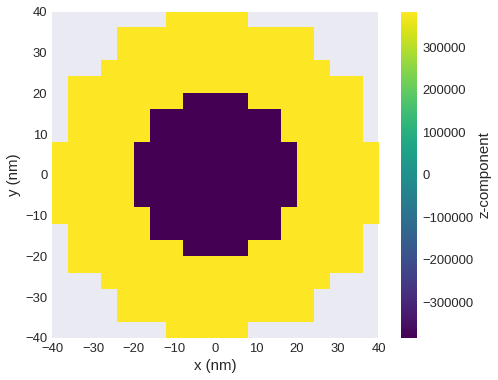

In [4]:
system.m.plane(z=0e-9, n=(20, 20)).mpl()

In [34]:
M = system.m.array

In [38]:
mx = M[:,:,:,0]
my = M[:,:,:,1]
mz = M[:,:,:,2]

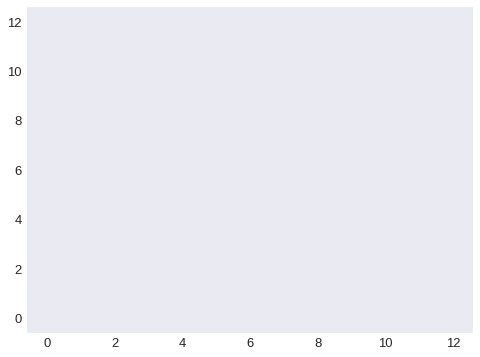

In [57]:
s=5
plt.quiver(mx[::s,::s,2],my[::s,::s,2])

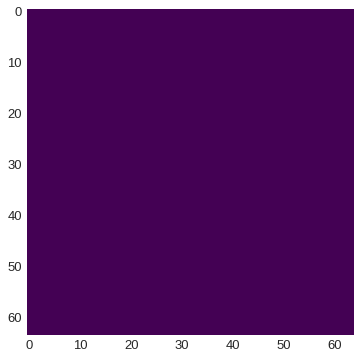

In [65]:
plt.imshow(mx[:,:,2])

In [77]:
B=0.3
initial_state='skyrmion'
thickness = 10e-9
cell = (2.5e-9, 2.5e-9, 2.5e-9)
p1 = (-d/2, -d/2, -thickness/2)
p2 = (d/2, d/2, thickness/2)
region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, cell=cell)

D = 1.58e-3
Ms = 3.84e5
A = 8.78e-12

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/2)**2:
        return Ms
    else:
        return 0

def m_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/4)**2:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

if initial_state == 'skyrmion':
    value = m_fun
elif initial_state == 'uniform':
    value = (0, 0, 1)

system = mm.System(name='parameter_space_point')
system.hamiltonian = mm.Exchange(A=A) + mm.DMI(D=D, crystalclass='T') + mm.Demag() + \
    mm.Zeeman(H=(0, 0, B/mm.consts.mu0))
system.m = df.Field(mesh, dim=3, value=value, norm=Ms_fun)

md = oc.MinDriver()
md.drive(system, overwrite=True)

Running OOMMF (ExeOOMMFRunner) [2021/07/08 20:49]...  <1> mmarchive killed
 <2> mmarchive killed
(1.3 s)
